In [5]:
# 第六讲 logistic回归
import torch
# import torch.nn.functional as F
 
# prepare dataset
x_data = torch.Tensor([[1.0], [2.0], [3.0]]) # 3✖️1的tensor
y_data = torch.Tensor([[0], [0], [1]])     # 同上
 
#design model using class
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1,1)
 
    def forward(self, x):
        # y_pred = F.sigmoid(self.linear(x))
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
model = LogisticRegressionModel()
 
# construct loss and optimizer
# 这里所有样本就是一个batch进去训练的
# 默认情况下，loss会基于element平均，如果size_average=False的话，loss会被累加。当我们采用mini-batch方法训练时，有时可能最后一个batch的batchSize与之前不一样就需要除一下。
criterion = torch.nn.BCELoss(size_average = False) 
optimizer = torch.optim.SGD(model.parameters(), lr = 0.07)
 
# training cycle forward, backward, update
for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
 
print('w = ', model.linear.weight.item())
print('b = ', model.linear.bias.item())
 
x_test = torch.Tensor([[4.0]])
y_test = model(x_test)
print('y_pred = ', y_test.data)

0 2.4867076873779297
1 2.3713269233703613
2 2.2966604232788086
3 2.2477617263793945
4 2.2139859199523926
5 2.1886723041534424
6 2.167980670928955
7 2.1498048305511475
8 2.1330246925354004
9 2.117053985595703
10 2.1015896797180176
11 2.086474895477295
12 2.071629047393799
13 2.057009696960449
14 2.042593479156494
15 2.0283689498901367
16 2.0143275260925293
17 2.000464916229248
18 1.9867770671844482
19 1.9732615947723389
20 1.9599151611328125
21 1.9467357397079468
22 1.9337204694747925
23 1.920867681503296
24 1.9081752300262451
25 1.895640254020691
26 1.88326096534729
27 1.8710349798202515
28 1.8589603900909424
29 1.8470351696014404
30 1.8352570533752441
31 1.8236234188079834
32 1.8121330738067627
33 1.8007839918136597
34 1.789573311805725
35 1.7784998416900635
36 1.7675611972808838
37 1.7567555904388428
38 1.7460813522338867
39 1.7355358600616455
40 1.7251181602478027
41 1.7148257493972778
42 1.7046570777893066
43 1.6946101188659668
44 1.6846833229064941
45 1.6748751401901245
46 1.66518

0 0.6469277739524841
1 0.6468253135681152
2 0.6467273831367493
3 0.6466339230537415
4 0.6465446949005127
5 0.6464594006538391
6 0.6463779211044312
7 0.6463000774383545
8 0.6462258100509644
9 0.6461547613143921
10 0.6460869312286377
11 0.6460220813751221
12 0.6459600925445557
13 0.6459009647369385
14 0.6458443403244019
15 0.6457903385162354
16 0.6457386016845703
17 0.6456892490386963
18 0.645642101764679
19 0.645596981048584
20 0.6455538868904114
21 0.6455127000808716
22 0.645473301410675
23 0.6454355716705322
24 0.6453996300697327
25 0.6453651785850525
26 0.645332396030426
27 0.6453008651733398
28 0.645270824432373
29 0.6452420949935913
30 0.6452145576477051
31 0.6451883316040039
32 0.6451631784439087
33 0.6451390981674194
34 0.6451160907745361
35 0.6450941562652588
36 0.6450730562210083
37 0.6450529098510742
38 0.6450337171554565
39 0.645015299320221
40 0.6449977159500122
41 0.644980788230896
42 0.6449646949768066
43 0.6449493169784546
44 0.6449344754219055
45 0.644920289516449
46 0.6

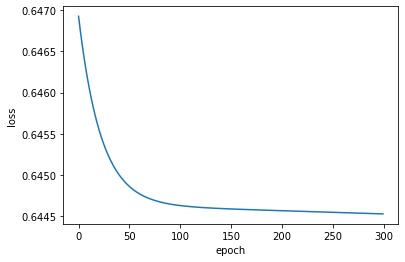

In [24]:
# lecture7:处理多维输入
import numpy as np
import torch
import matplotlib.pyplot as plt
 
# prepare dataset
xy = np.loadtxt('diabetes.csv', delimiter=',', dtype=np.float32)
x_data = torch.from_numpy(xy[:, :-1]) # 第一个‘：’是指读取所有行，第二个‘：’是指从第一列开始，最后一列不要
y_data = torch.from_numpy(xy[:, [-1]]) # [-1] 最后得到的是个矩阵
 
# design model using class
 
 
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6) # 输入数据x的特征是8维，x有8个特征
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid() # 将其看作是网络的一层，而不是简单的函数使用,这里不能用relu，因为会出现大雨1的，会跟下面用的BCEloss冲突的。
 
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x)) # y hat
        return x
 
 
model = Model()
 
# construct loss and optimizer
# criterion = torch.nn.BCELoss(size_average = True)
criterion = torch.nn.BCELoss(reduction='mean')  
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
 
epoch_list = []
loss_list = []
# training cycle forward, backward, update
for epoch in range(300):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())
    epoch_list.append(epoch)
    loss_list.append(loss.item())
 
    optimizer.zero_grad()
    loss.backward()
 
    optimizer.step()
 
 
plt.plot(epoch_list, loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


In [15]:
xy = np.loadtxt('diabetes.csv', delimiter=',', dtype=np.float32)
xy
xy[0][0]

-0.294118